TASK

* Business Understanding
* Data understanding
* Exploratory data Analysis
* Data Preparation
* Model Building ( Logistic Regression, ensemble, Boosting etc)
* Model Selection
* Performance reporting
* Deploy the model
* Converting ML metrics into Business metric and explaining result to business
* Prepare presentation for non technical persons.

* Data Set Information :

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

 


Attribute Information:

Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('bank.csv',sep = ';')
ff = pd.read_csv('bank-full.csv',sep = ';')

In [3]:

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:xlabel='duration'>

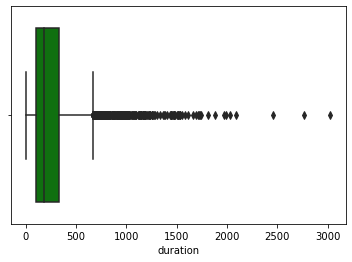

In [5]:
sns.boxplot(x = 'duration',data = df,color="g")

<AxesSubplot:ylabel='age'>

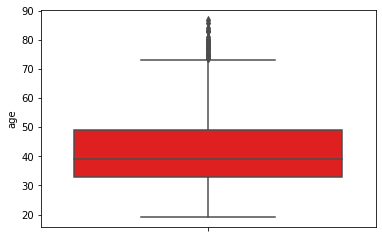

In [6]:
sns.boxplot(y = 'age',data = df,color="r")

There are outliers in the age and duration. Since duration can vary from customer to customer this outlier will not be altered.

(array([ 111.,  944., 1235.,  869.,  612.,  576.,  100.,   36.,   30.,
           8.]),
 array([19. , 25.8, 32.6, 39.4, 46.2, 53. , 59.8, 66.6, 73.4, 80.2, 87. ]),
 <BarContainer object of 10 artists>)

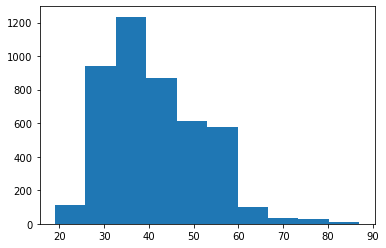

In [7]:
plt.hist('age',data=df)

(array([3.285e+03, 8.250e+02, 2.670e+02, 9.100e+01, 2.900e+01, 1.600e+01,
        5.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([   4. ,  306.1,  608.2,  910.3, 1212.4, 1514.5, 1816.6, 2118.7,
        2420.8, 2722.9, 3025. ]),
 <BarContainer object of 10 artists>)

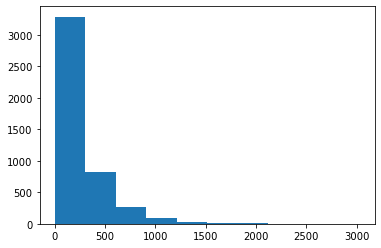

In [8]:
plt.hist('duration',data=df)

C:\Users\babla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

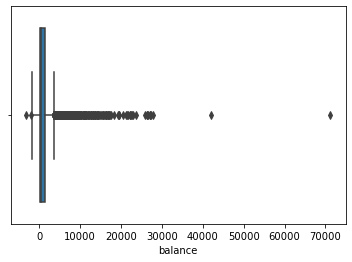

In [9]:
sns.boxplot("balance",data=df)

(array([4.111e+03, 3.400e+02, 4.700e+01, 1.700e+01, 4.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3313. ,  4137.1, 11587.2, 19037.3, 26487.4, 33937.5, 41387.6,
        48837.7, 56287.8, 63737.9, 71188. ]),
 <BarContainer object of 10 artists>)

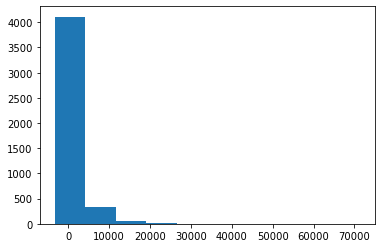

In [10]:
plt.hist("balance",data=df)

<AxesSubplot:xlabel='y', ylabel='count'>

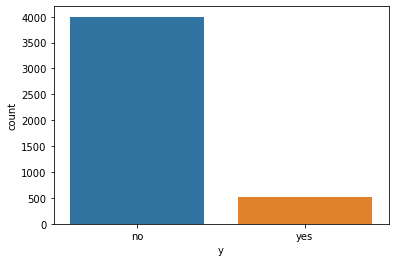

In [12]:
sns.countplot(data = df, x = 'y')

C:\Users\babla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'PREVIOUS'}, xlabel='previous'>

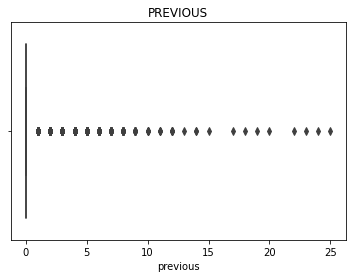

In [13]:

plt.title('PREVIOUS')
sns.boxplot(df['previous'])




C:\Users\babla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'CAMPAIGN'}, xlabel='campaign'>

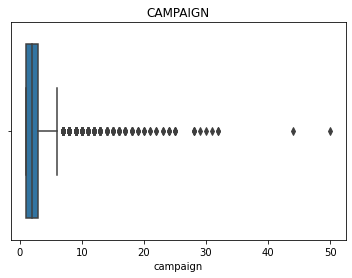

In [14]:

plt.title('CAMPAIGN')
sns.boxplot(df['campaign'])

In [18]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code



Unique outliers from IQR method:  {74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 87}
Number of outliers from IQR method:  38


In [20]:
sample_outliers = detect_outliers_iqr(df['age'])
print("Unique outliers from IQR method: ", set(sample_outliers))

print("Number of outliers from IQR method: ", len(sample_outliers))


Unique outliers from IQR method:  {74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 87}
Number of outliers from IQR method:  76


In [21]:
sample_outliers = detect_outliers_iqr(df['duration'])
print("Unique outliers from IQR method: ", set(sample_outliers))

print("Number of outliers from IQR method: ", len(sample_outliers))

Unique outliers from IQR method:  {1028, 1029, 1030, 1031, 1032, 1034, 1529, 1044, 1558, 1056, 1060, 1063, 2087, 1065, 1579, 1073, 1740, 1081, 1083, 1088, 1608, 1097, 74, 75, 76, 77, 78, 79, 80, 81, 1101, 83, 84, 86, 87, 1117, 1124, 1126, 1130, 2769, 1139, 1143, 1149, 1151, 1663, 1156, 1164, 1165, 1168, 1173, 1174, 1689, 1178, 667, 668, 669, 670, 671, 672, 673, 674, 1181, 676, 1183, 679, 680, 681, 682, 684, 686, 1199, 688, 1713, 690, 691, 693, 696, 697, 698, 699, 700, 701, 702, 1210, 1212, 1721, 707, 709, 1223, 712, 1225, 1735, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 1231, 727, 728, 1234, 730, 731, 732, 733, 735, 736, 738, 742, 743, 744, 746, 747, 748, 749, 750, 1258, 1259, 753, 754, 755, 756, 757, 758, 759, 1263, 761, 762, 763, 764, 765, 766, 767, 768, 1275, 770, 1282, 772, 773, 775, 777, 779, 780, 781, 783, 785, 788, 789, 792, 793, 1816, 796, 1309, 798, 799, 800, 803, 805, 806, 808, 809, 812, 814, 815, 816, 819, 820, 821, 825, 1337, 827, 830, 834, 836, 847, 1877, 854, 

In [22]:
df.drop(df[df['duration'] > 700].index,inplace = True)

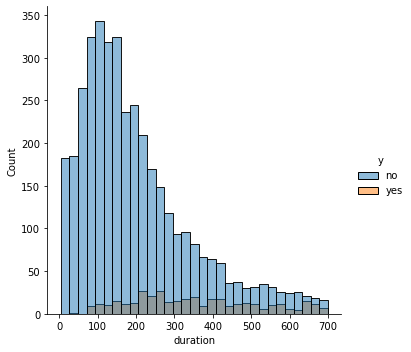

In [23]:
sns.displot(x = df['duration'],hue = df['y'])


In [24]:
median_y = df[df['y'] == 'yes']['duration'].median()
median_n = df[df['y'] == 'no']['duration'].median()


(array([4.223e+03, 5.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([       0.        ,  1284744.59996663,  2569489.19993325,
         3854233.79989988,  5138978.39986651,  6423722.99983313,
         7708467.59979976,  8993212.19976639, 10277956.79973301,
        11562701.39969964, 12847445.99966627]),
 <BarContainer object of 10 artists>)

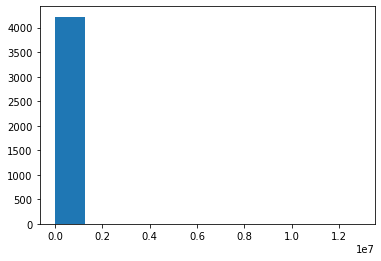

In [35]:
df['campaign'] = (df['campaign'])**4

plt.hist(df['campaign'])


In [36]:
df.to_csv('Outliers_Managed.csv')